In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
import pandas as pd
import numpy as np

In [3]:
#import dataset
df = pd.read_csv('thailotto.csv', dtype=str)
df.head()

,date,firstprize,3pre_number1,3pre_number2,3post_number1,3post_number2,2post_number
0,17\n มกราคม\n ...,807779,961,699,477,448,23
1,2\n มกราคม\n ...,730209,065,446,376,297,51
2,16\n ธันวาคม\n ...,097863,290,742,339,881,21
3,1\n ธันวาคม\n ...,669843,559,626,098,654,61
4,16\n พฤศจิกายน\n ...,187221,036,923,547,980,38


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           355 non-null    object
 1   firstprize     355 non-null    object
 2   3pre_number1   355 non-null    object
 3   3pre_number2   355 non-null    object
 4   3post_number1  355 non-null    object
 5   3post_number2  355 non-null    object
 6   2post_number   338 non-null    object
dtypes: object(7)
memory usage: 19.5+ KB


In [5]:
#remove \n in date
df['date'] = df['date'].apply(lambda a : a.replace('\n',''))
df['date']

#remove space 
df['date'] = df['date'].apply(lambda a : a.replace(' ',''))
df['date']

0         17มกราคม2568
1          2มกราคม2568
2        16ธันวาคม2567
3         1ธันวาคม2567
4      16พฤศจิกายน2567
            ...       
350       2พฤษภาคม2553
351       16เมษายน2553
352        1เมษายน2553
353       16มีนาคม2553
354        1มีนาคม2553
Name: date, Length: 355, dtype: object

In [6]:
# change month to month number
def changeDateFormat(a):
    month = {'มกราคม':'/01/',
             'กุมภาพันธ์':'/02/',
             'มีนาคม':'/03/',
             'เมษายน':'/04/',
             'พฤษภาคม':'/05/',
             'มิถุนายน':'/06/',
             'กรกฎาคม':'/07/',
             'สิงหาคม':'/08/',
             'กันยายน':'/09/',
             'ตุลาคม':'/10/',
             'พฤศจิกายน':'/11/',
             'ธันวาคม':'/12/'}
    for key, value in month.items():
        if (key in a):
            return a.replace(key, value)

df['date'] = df['date'].apply(changeDateFormat)
df['date'].head()

0    17/01/2568
1     2/01/2568
2    16/12/2567
3     1/12/2567
4    16/11/2567
Name: date, dtype: object

In [7]:
#change year to Kor Sor (lol i dunno how it's called)
df['date'] = df['date'].apply(
    lambda x: '/'.join(x.split('/')[:2] + [str(int(x.split('/')[-1]) - 543)])
)
df['date']

0      17/01/2025
1       2/01/2025
2      16/12/2024
3       1/12/2024
4      16/11/2024
          ...    
350     2/05/2010
351    16/04/2010
352     1/04/2010
353    16/03/2010
354     1/03/2010
Name: date, Length: 355, dtype: object

In [8]:
# Convert adjusted dates to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['date']

0     2025-01-17
1     2025-01-02
2     2024-12-16
3     2024-12-01
4     2024-11-16
         ...    
350   2010-05-02
351   2010-04-16
352   2010-04-01
353   2010-03-16
354   2010-03-01
Name: date, Length: 355, dtype: datetime64[ns]

In [9]:
#drop unneccessary column (in this case i use only 'firstprize' column)
df.drop(columns=['3pre_number1', '3pre_number2','3post_number1', '3post_number2','2post_number'],
       inplace=True)


In [10]:
df.head()

,date,firstprize
0,2025-01-17,807779
1,2025-01-02,730209
2,2024-12-16,097863
3,2024-12-01,669843
4,2024-11-16,187221


In [11]:
#extract number into individual columns
df[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']] = df['firstprize'].astype(str).apply(lambda x: pd.Series(list(x)))
df

,date,firstprize,d1,d2,d3,d4,d5,d6
0,2025-01-17,807779,8,0,7,7,7,9
1,2025-01-02,730209,7,3,0,2,0,9
2,2024-12-16,097863,0,9,7,8,6,3
3,2024-12-01,669843,6,6,9,8,4,3
4,2024-11-16,187221,1,8,7,2,2,1
...,...,...,...,...,...,...,...,...
350,2010-05-02,360371,3,6,0,3,7,1
351,2010-04-16,211743,2,1,1,7,4,3
352,2010-04-01,959517,9,5,9,5,1,7
353,2010-03-16,364222,3,6,4,2,2,2


In [12]:
df.head()

,date,firstprize,d1,d2,d3,d4,d5,d6
0,2025-01-17,807779,8,0,7,7,7,9
1,2025-01-02,730209,7,3,0,2,0,9
2,2024-12-16,097863,0,9,7,8,6,3
3,2024-12-01,669843,6,6,9,8,4,3
4,2024-11-16,187221,1,8,7,2,2,1


In [13]:
#lemme save this real quick!
df.to_csv('thailotto_extracted.csv', index=False)

In [14]:
#change d_ columns into int64
cols = ['d1','d2','d3','d4','d5','d6']
for i in cols:
    df[i] = df[i].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        355 non-null    datetime64[ns]
 1   firstprize  355 non-null    object        
 2   d1          355 non-null    int64         
 3   d2          355 non-null    int64         
 4   d3          355 non-null    int64         
 5   d4          355 non-null    int64         
 6   d5          355 non-null    int64         
 7   d6          355 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 22.3+ KB


In [16]:
#sum all digits and create column 'sum'
res = 0
for i in cols:
    res += df[i]

df['sum'] = res

In [17]:
#count odds & evens
def count_odd_even(row):
    digits = [row[f'd{i}'] for i in range(1, 7)]
    odd = sum(1 for digit in digits if digit % 2 != 0)
    even = sum(1 for digit in digits if digit % 2 == 0)
    return pd.Series([odd, even])


df[['odd', 'even']] = df.apply(count_odd_even, axis=1)

print(df)

          date firstprize  d1  d2  d3  d4  d5  d6  sum  odd  even
0   2025-01-17     807779   8   0   7   7   7   9   38    4     2
1   2025-01-02     730209   7   3   0   2   0   9   21    3     3
2   2024-12-16     097863   0   9   7   8   6   3   33    3     3
3   2024-12-01     669843   6   6   9   8   4   3   36    2     4
4   2024-11-16     187221   1   8   7   2   2   1   21    3     3
..         ...        ...  ..  ..  ..  ..  ..  ..  ...  ...   ...
350 2010-05-02     360371   3   6   0   3   7   1   20    4     2
351 2010-04-16     211743   2   1   1   7   4   3   18    4     2
352 2010-04-01     959517   9   5   9   5   1   7   36    6     0
353 2010-03-16     364222   3   6   4   2   2   2   19    1     5
354 2010-03-01     215227   2   1   5   2   2   7   19    3     3

[355 rows x 11 columns]


In [18]:
df.head()

,date,firstprize,d1,d2,d3,d4,d5,d6,sum,odd,even
0,2025-01-17,807779,8,0,7,7,7,9,38,4,2
1,2025-01-02,730209,7,3,0,2,0,9,21,3,3
2,2024-12-16,097863,0,9,7,8,6,3,33,3,3
3,2024-12-01,669843,6,6,9,8,4,3,36,2,4
4,2024-11-16,187221,1,8,7,2,2,1,21,3,3


In [19]:
#bro this one is sus
df[df['sum'] == df['sum'].max()]

,date,firstprize,d1,d2,d3,d4,d5,d6,sum,odd,even
105,2020-09-01,999997,9,9,9,9,9,7,52,6,0


In [20]:
#reverse dataframe
df_rev = df.iloc[::-1]

In [21]:
df_rev

,date,firstprize,d1,d2,d3,d4,d5,d6,sum,odd,even
354,2010-03-01,215227,2,1,5,2,2,7,19,3,3
353,2010-03-16,364222,3,6,4,2,2,2,19,1,5
352,2010-04-01,959517,9,5,9,5,1,7,36,6,0
351,2010-04-16,211743,2,1,1,7,4,3,18,4,2
350,2010-05-02,360371,3,6,0,3,7,1,20,4,2
...,...,...,...,...,...,...,...,...,...,...,...
4,2024-11-16,187221,1,8,7,2,2,1,21,3,3
3,2024-12-01,669843,6,6,9,8,4,3,36,2,4
2,2024-12-16,097863,0,9,7,8,6,3,33,3,3
1,2025-01-02,730209,7,3,0,2,0,9,21,3,3


In [22]:
df_rev['odd'].sum()

np.int64(1075)

In [23]:
df_rev['even'].sum()

np.int64(1055)

In [24]:
df_rev.describe()

,date,d1,d2,d3,d4,d5,d6,sum,odd,even
count,355,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,2017-07-31 01:08:57.464788736,4.529577,4.349296,4.315493,4.569014,4.253521,4.487324,26.504225,3.028169,2.971831
min,2010-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
25%,2013-11-08 12:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000,2.000000,2.000000
50%,2017-07-16 00:00:00,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,26.000000,3.000000,3.000000
75%,2021-05-09 00:00:00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,31.000000,4.000000,4.000000
max,2025-01-17 00:00:00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,52.000000,6.000000,6.000000
std,NaN,2.934521,2.871390,2.878257,2.798839,2.941608,2.746694,6.983585,1.252927,1.252927


In [25]:
df_rev.head()

,date,firstprize,d1,d2,d3,d4,d5,d6,sum,odd,even
354,2010-03-01,215227,2,1,5,2,2,7,19,3,3
353,2010-03-16,364222,3,6,4,2,2,2,19,1,5
352,2010-04-01,959517,9,5,9,5,1,7,36,6,0
351,2010-04-16,211743,2,1,1,7,4,3,18,4,2
350,2010-05-02,360371,3,6,0,3,7,1,20,4,2


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

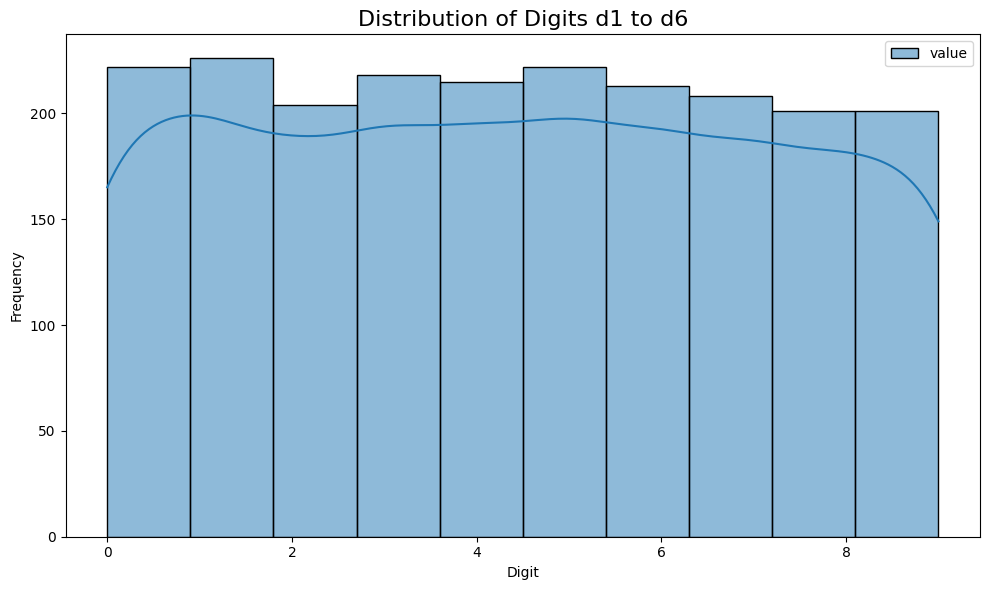

In [27]:
# Plot the distribution of d1 to d6
plt.figure(figsize=(10, 6))
sns.histplot(df_rev[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']].melt(), kde=True, bins=10)
plt.title("Distribution of Digits d1 to d6", fontsize=16)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

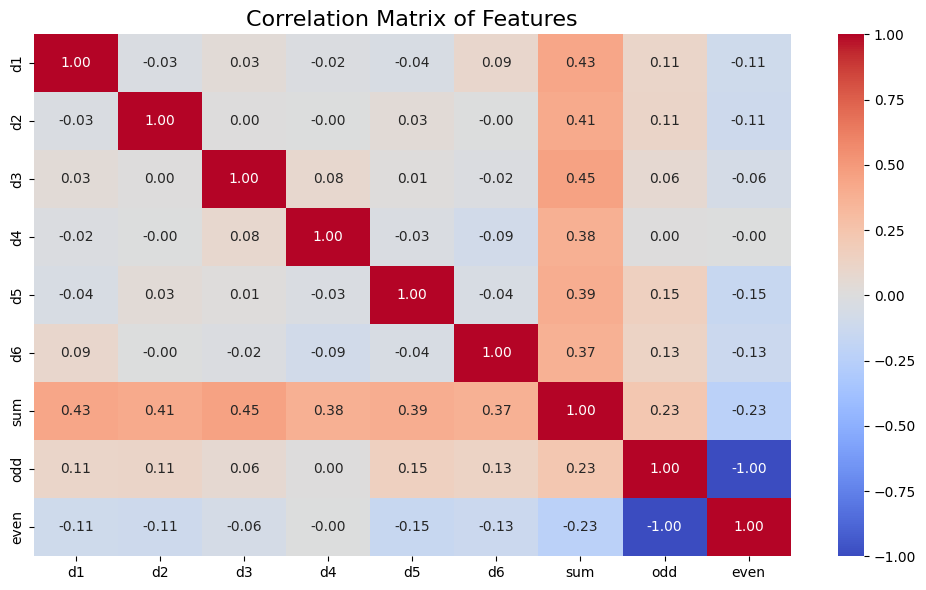

In [28]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df_rev[['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'sum', 'odd', 'even']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, )
plt.title("Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()

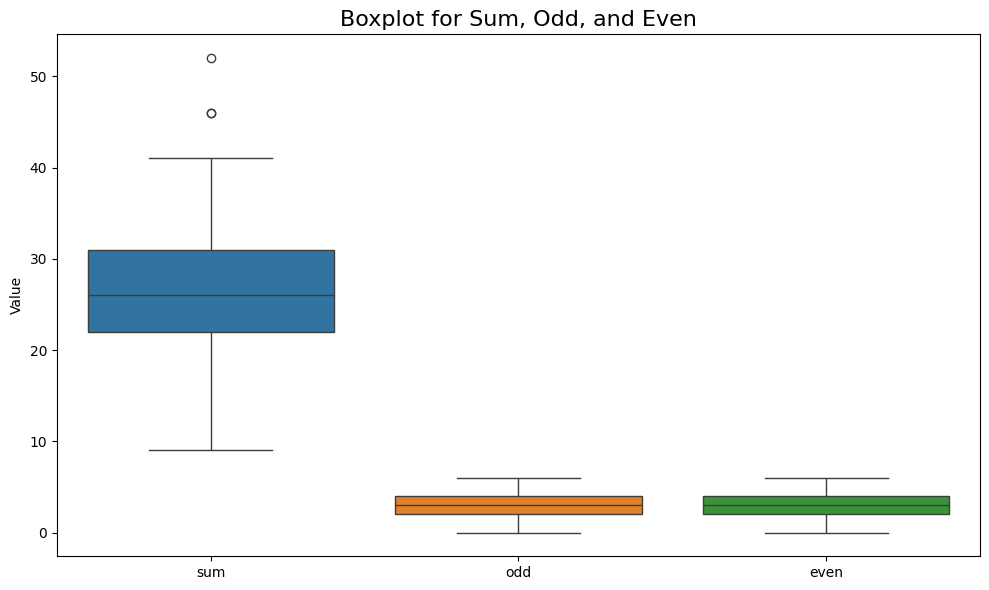

In [29]:
# Boxplot for the sum, odd, and even
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rev[['sum', 'odd', 'even']])
plt.title("Boxplot for Sum, Odd, and Even", fontsize=16)
plt.ylabel("Value")
plt.tight_layout()
plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_5396\230646462.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_rev, palette='Set2')
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\230646462.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_rev, palette='Set2')
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\230646462.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_rev, palette='Set2')
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\230646462.py:9: FutureWarning: 

P

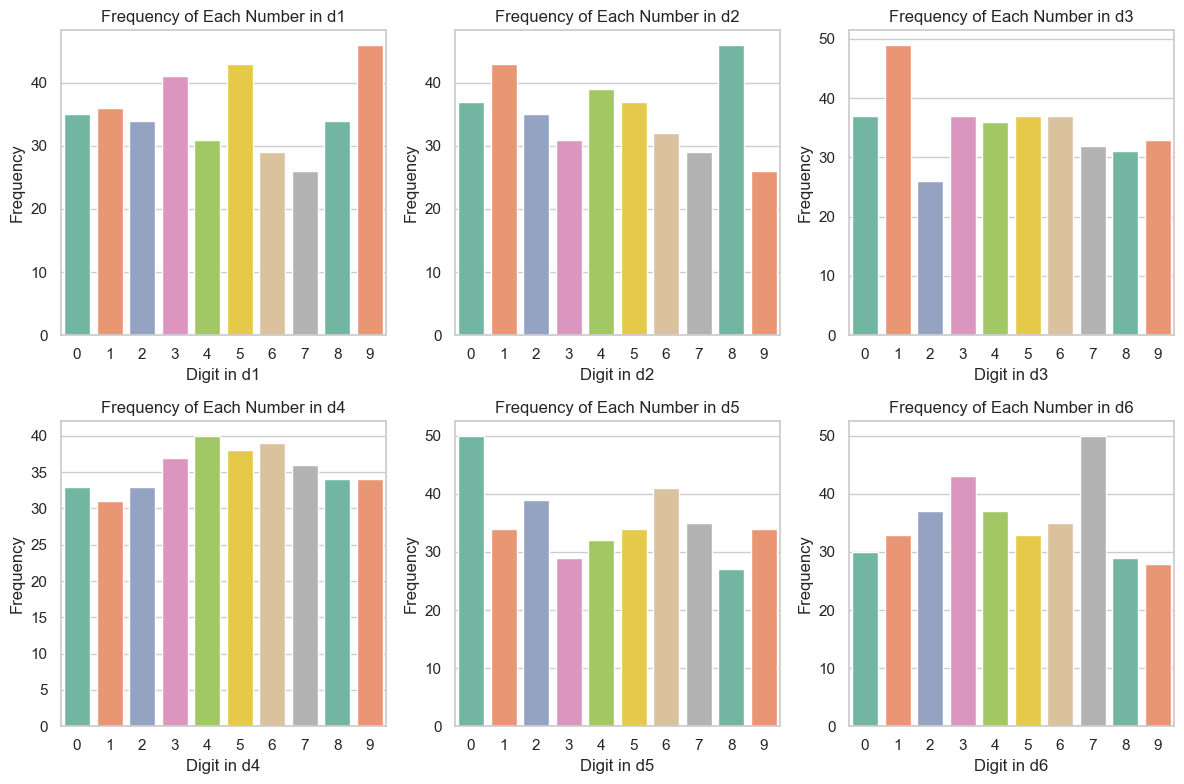

In [30]:
sns.set(style="whitegrid")

# Create a figure to plot d1 to d6 in a grid
plt.figure(figsize=(12, 8))

# Plot frequency of each digit in d1 to d6
for i, column in enumerate(['d1', 'd2', 'd3', 'd4', 'd5', 'd6'], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df_rev, palette='Set2')
    plt.title(f"Frequency of Each Number in {column}", fontsize=12)
    plt.xlabel(f"Digit in {column}")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

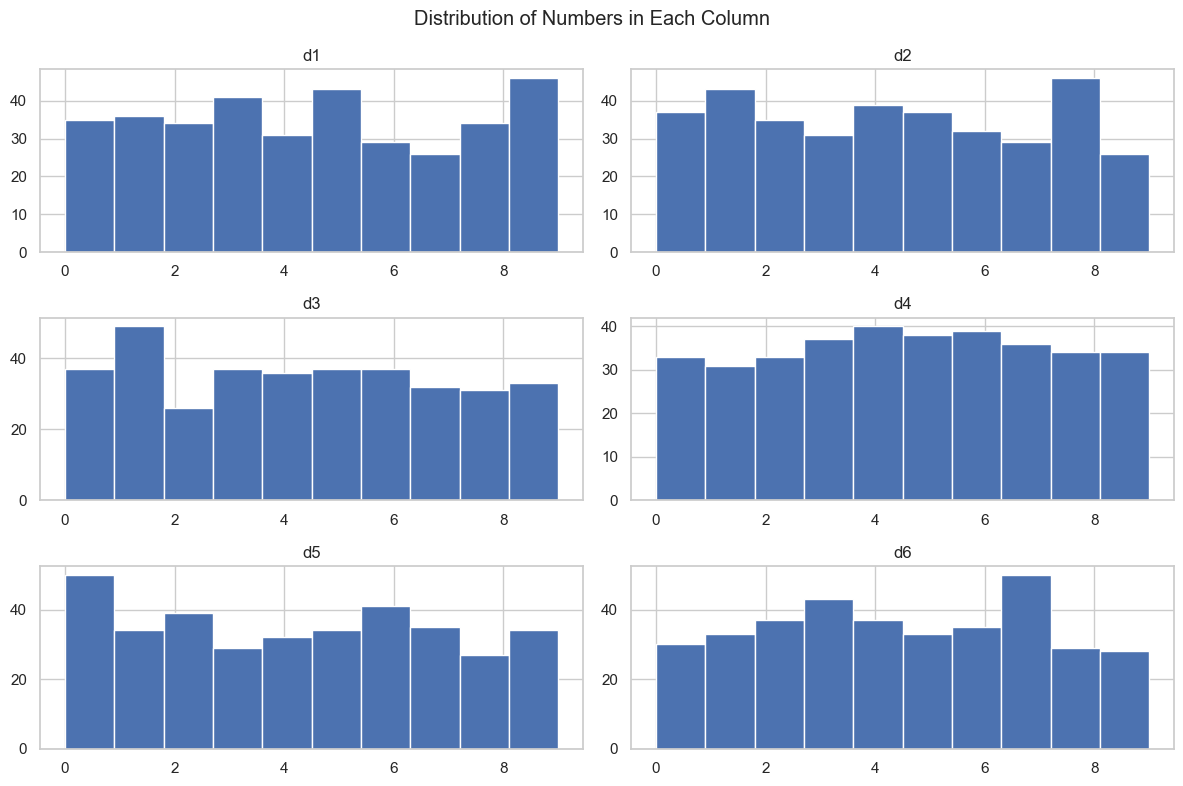

In [31]:
df_rev[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']].hist(bins=10, figsize=(12, 8))
plt.suptitle('Distribution of Numbers in Each Column')
plt.tight_layout()
plt.show()

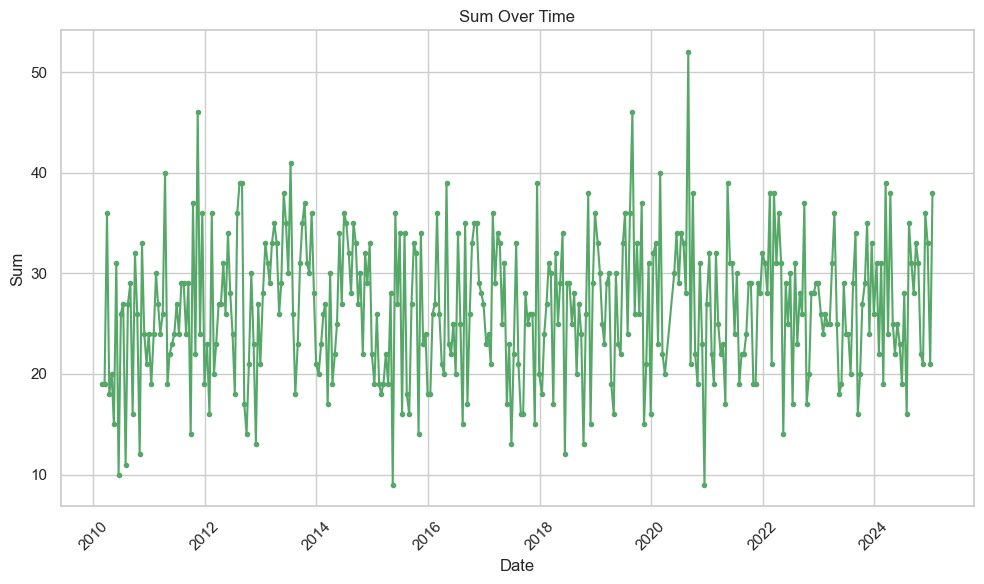

In [32]:
# Plot sum over time
plt.figure(figsize=(10, 6))
plt.plot(df_rev['date'], df_rev['sum'], marker='.', linestyle='-', color='g')
plt.title('Sum Over Time')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_5396\453763196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_rev['sum'], palette='Set2')


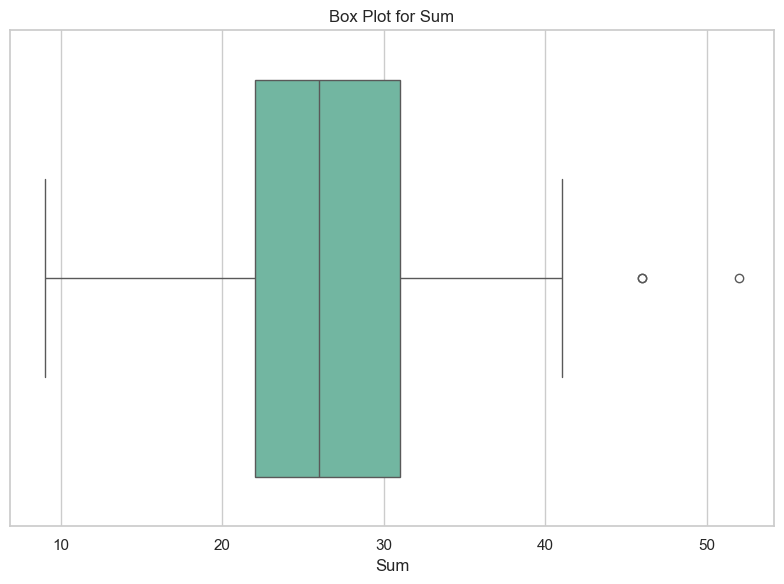

In [33]:
# Box plot for sum
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_rev['sum'], palette='Set2')
plt.title('Box Plot for Sum')
plt.xlabel('Sum')
plt.tight_layout()
plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_5396\4290730710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev[f'{col}_odd'] = df_rev[col] % 2 != 0
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\4290730710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev[f'{col}_even'] = df_rev[col] % 2 == 0
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\4290730710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

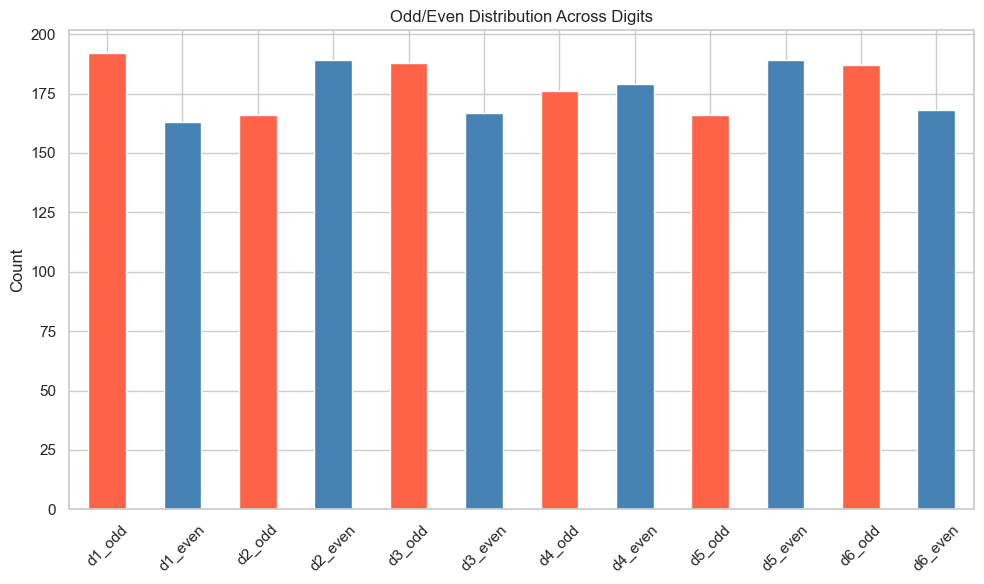

In [34]:
# Create a new column for 'odd/even' classification in d1 to d6
for col in ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']:
    df_rev[f'{col}_odd'] = df_rev[col] % 2 != 0
    df_rev[f'{col}_even'] = df_rev[col] % 2 == 0

# Stacked bar plot for odd/even in each digit column
df_rev[['d1_odd', 'd1_even', 'd2_odd', 'd2_even', 'd3_odd', 'd3_even', 'd4_odd', 'd4_even', 'd5_odd', 'd5_even', 'd6_odd', 'd6_even']].sum().plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6347', '#4682B4'])
plt.title('Odd/Even Distribution Across Digits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\francis\AppData\Local\Temp\ipykernel_5396\1225380556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev['rolling_sum'] = df_rev['sum'].rolling(window=5).mean()


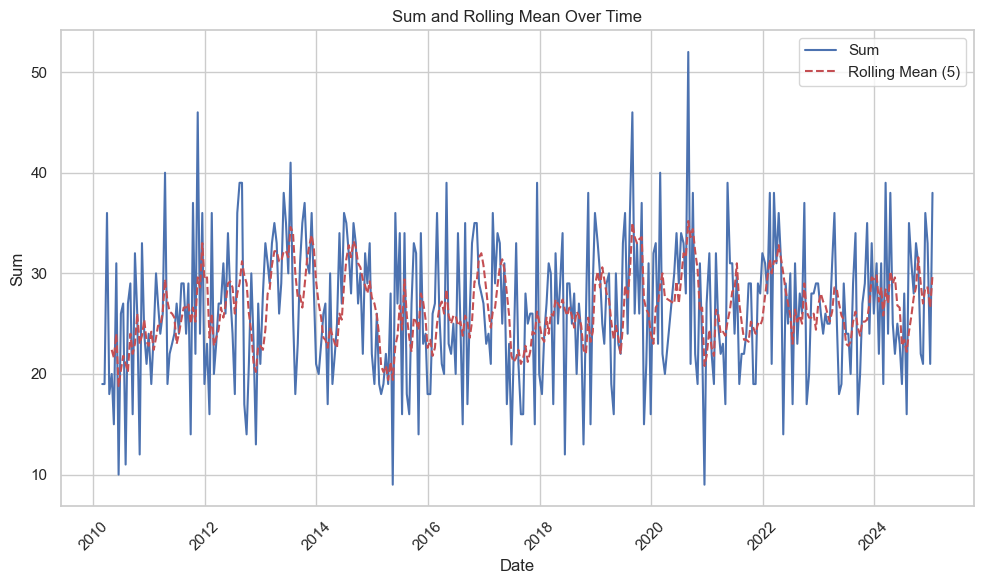

In [35]:
#Rolling Mean of Sum
df_rev['rolling_sum'] = df_rev['sum'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_rev['date'], df_rev['sum'], label='Sum', color='b')
plt.plot(df_rev['date'], df_rev['rolling_sum'], label='Rolling Mean (5)', color='r', linestyle='--')
plt.title('Sum and Rolling Mean Over Time')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 354 to 0
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         355 non-null    datetime64[ns]
 1   firstprize   355 non-null    object        
 2   d1           355 non-null    int64         
 3   d2           355 non-null    int64         
 4   d3           355 non-null    int64         
 5   d4           355 non-null    int64         
 6   d5           355 non-null    int64         
 7   d6           355 non-null    int64         
 8   sum          355 non-null    int64         
 9   odd          355 non-null    int64         
 10  even         355 non-null    int64         
 11  d1_odd       355 non-null    bool          
 12  d1_even      355 non-null    bool          
 13  d2_odd       355 non-null    bool          
 14  d2_even      355 non-null    bool          
 15  d3_odd       355 non-null    bool          
 16  d3_even 

In [37]:
#manual one hot encoding
cols = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']
for i in cols:
    for digit in range(10):
        df_rev[f'{i}_{digit}'] = (df_rev[i] == digit).astype(int)


onehotdf = df_rev.drop(columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6','sum','odd','even',
                               'd1_odd','d1_even','d2_odd','d2_even','d3_odd','d3_even',
                               'd4_odd','d4_even','d5_odd','d5_even','d6_odd','d6_even',
                               'rolling_sum'])

C:\Users\francis\AppData\Local\Temp\ipykernel_5396\1842286778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev[f'{i}_{digit}'] = (df_rev[i] == digit).astype(int)
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\1842286778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev[f'{i}_{digit}'] = (df_rev[i] == digit).astype(int)
C:\Users\francis\AppData\Local\Temp\ipykernel_5396\1842286778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
onehotdf

,date,firstprize,d1_0,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d1_7,...,d6_0,d6_1,d6_2,d6_3,d6_4,d6_5,d6_6,d6_7,d6_8,d6_9
354,2010-03-01,215227,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
353,2010-03-16,364222,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
352,2010-04-01,959517,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
351,2010-04-16,211743,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
350,2010-05-02,360371,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-11-16,187221,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2024-12-01,669843,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2024-12-16,097863,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2025-01-02,730209,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
onehotdf.to_csv('onehotdf.csv', index=False)

In [ ]:
onehotdf

In [440]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

In [483]:
# Feature Set (use d1 to d6, sum, odd, even to predict d1 to d6)
X = df_rev[['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'sum', 'odd', 'even']]
y = df_rev[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']]  # Target is d1 to d6

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Model: Multi-output regression with XGBoost
model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the performance using Mean Absolute Error (for each digit)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (per digit): ", mae)

# Predict the next sequence (d1 to d6) based on new data
new_data = pd.DataFrame({
    'd1': [5],   # Example previous digit
    'd2': [5],   # Example previous digit
    'd3': [5],   # Example previous digit
    'd4': [5],   # Example previous digit
    'd5': [5],   # Example previous digit
    'd6': [5],   # Example previous digit
    'sum': [19],  # Example sum of digits
    'odd': [3],   # Example count of odd numbers
    'even': [3]   # Example count of even numbers
})
next_digits = model.predict(new_data)
print("Predicted next 6 digits: ", next_digits)

Mean Absolute Error (per digit):  6.218286283474526e-05
Predicted next 6 digits:  [[5.000004  5.000008  4.999974  5.000011  4.9999785 4.999996 ]]
